In [1]:
from pandas import read_csv
import pandas as pd
import numpy as np
from numpy import nan
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, RepeatedKFold, cross_val_score
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
#from sklearn.ensemble import StackingRegressor
#from mlxtend.regressor import StackingCVRegressor    # uses hold out or out of sample predictions method 
#from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
#from matplotlib import pyplot
from sklearn.svm import SVR
from PyEMD import EEMD
from PyEMD import ESN
from statsmodels.tsa.arima.model import ARIMA

C:\Users\Nimma Harshitha\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
series = pd.read_csv('D:/MINI/univariate_KBPS_hdr.csv', header=0, index_col=0,parse_dates=[0])
series = series.resample('10T').sum()   # T for minutes 10T - 10min, 15T - 15min, H for Hours, D for Day
print(series.head())
print(len(series))
data = series.values
data=data.flatten()

                      frame.len
Dateandtime                    
2003-12-07 05:30:00   94839.435
2003-12-07 05:40:00   59537.895
2003-12-07 05:50:00   60293.757
2003-12-07 06:00:00   83634.900
2003-12-07 06:10:00  130818.833
13105


In [3]:
eemd = EEMD()
IMF = eemd.eemd(data)
#print(len(IMF)
print(len(IMF[1]))
print(len(IMF[2]))
print(len(IMF[3]))
print(len(IMF))
print('-------trying loop--------')
for i in range(len(IMF)):
    print("IMF:",i)
    print(IMF[i])


13105
13105
13105
13
-------trying loop--------
IMF: 0
[ 14692.20903291 -11194.4852935  -16561.81030493 ... -62826.55103166
  96375.57526402 -99684.06828962]
IMF: 1
[ -1563.23756471 -14066.26660958 -11161.67817256 ...  31077.59656939
  35116.6710497  -40904.23611204]
IMF: 2
[ -2381.68114681  -4701.410858    -3291.20036245 ...   9742.14378173
   3347.60646384 -10709.9191471 ]
IMF: 3
[-6395.0677274  -7326.82323568 -8126.68705607 ...  2504.7186788
  -499.94496781 -3372.61847362]
IMF: 4
[10224.08969276 10704.95530121 11393.00069865 ... 19257.59181075
 17720.437663   16197.83500822]
IMF: 5
[-26622.81323356 -26658.12435853 -26607.82046369 ...  38633.17024425
  37865.208295    36846.71111735]
IMF: 6
[-5337.09624208 -5605.5433235  -5878.79578872 ...  2835.8128484
  2744.92861907  2607.72620234]
IMF: 7
[-29775.9063611  -29883.1251287  -29984.67770444 ... -42954.66001354
 -42765.62998061 -42573.27512093]
IMF: 8
[-17880.76930555 -17884.22915096 -17885.89525632 ... -73722.05567208
 -73627.23721332

In [4]:
IMF.shape[0]+1

14

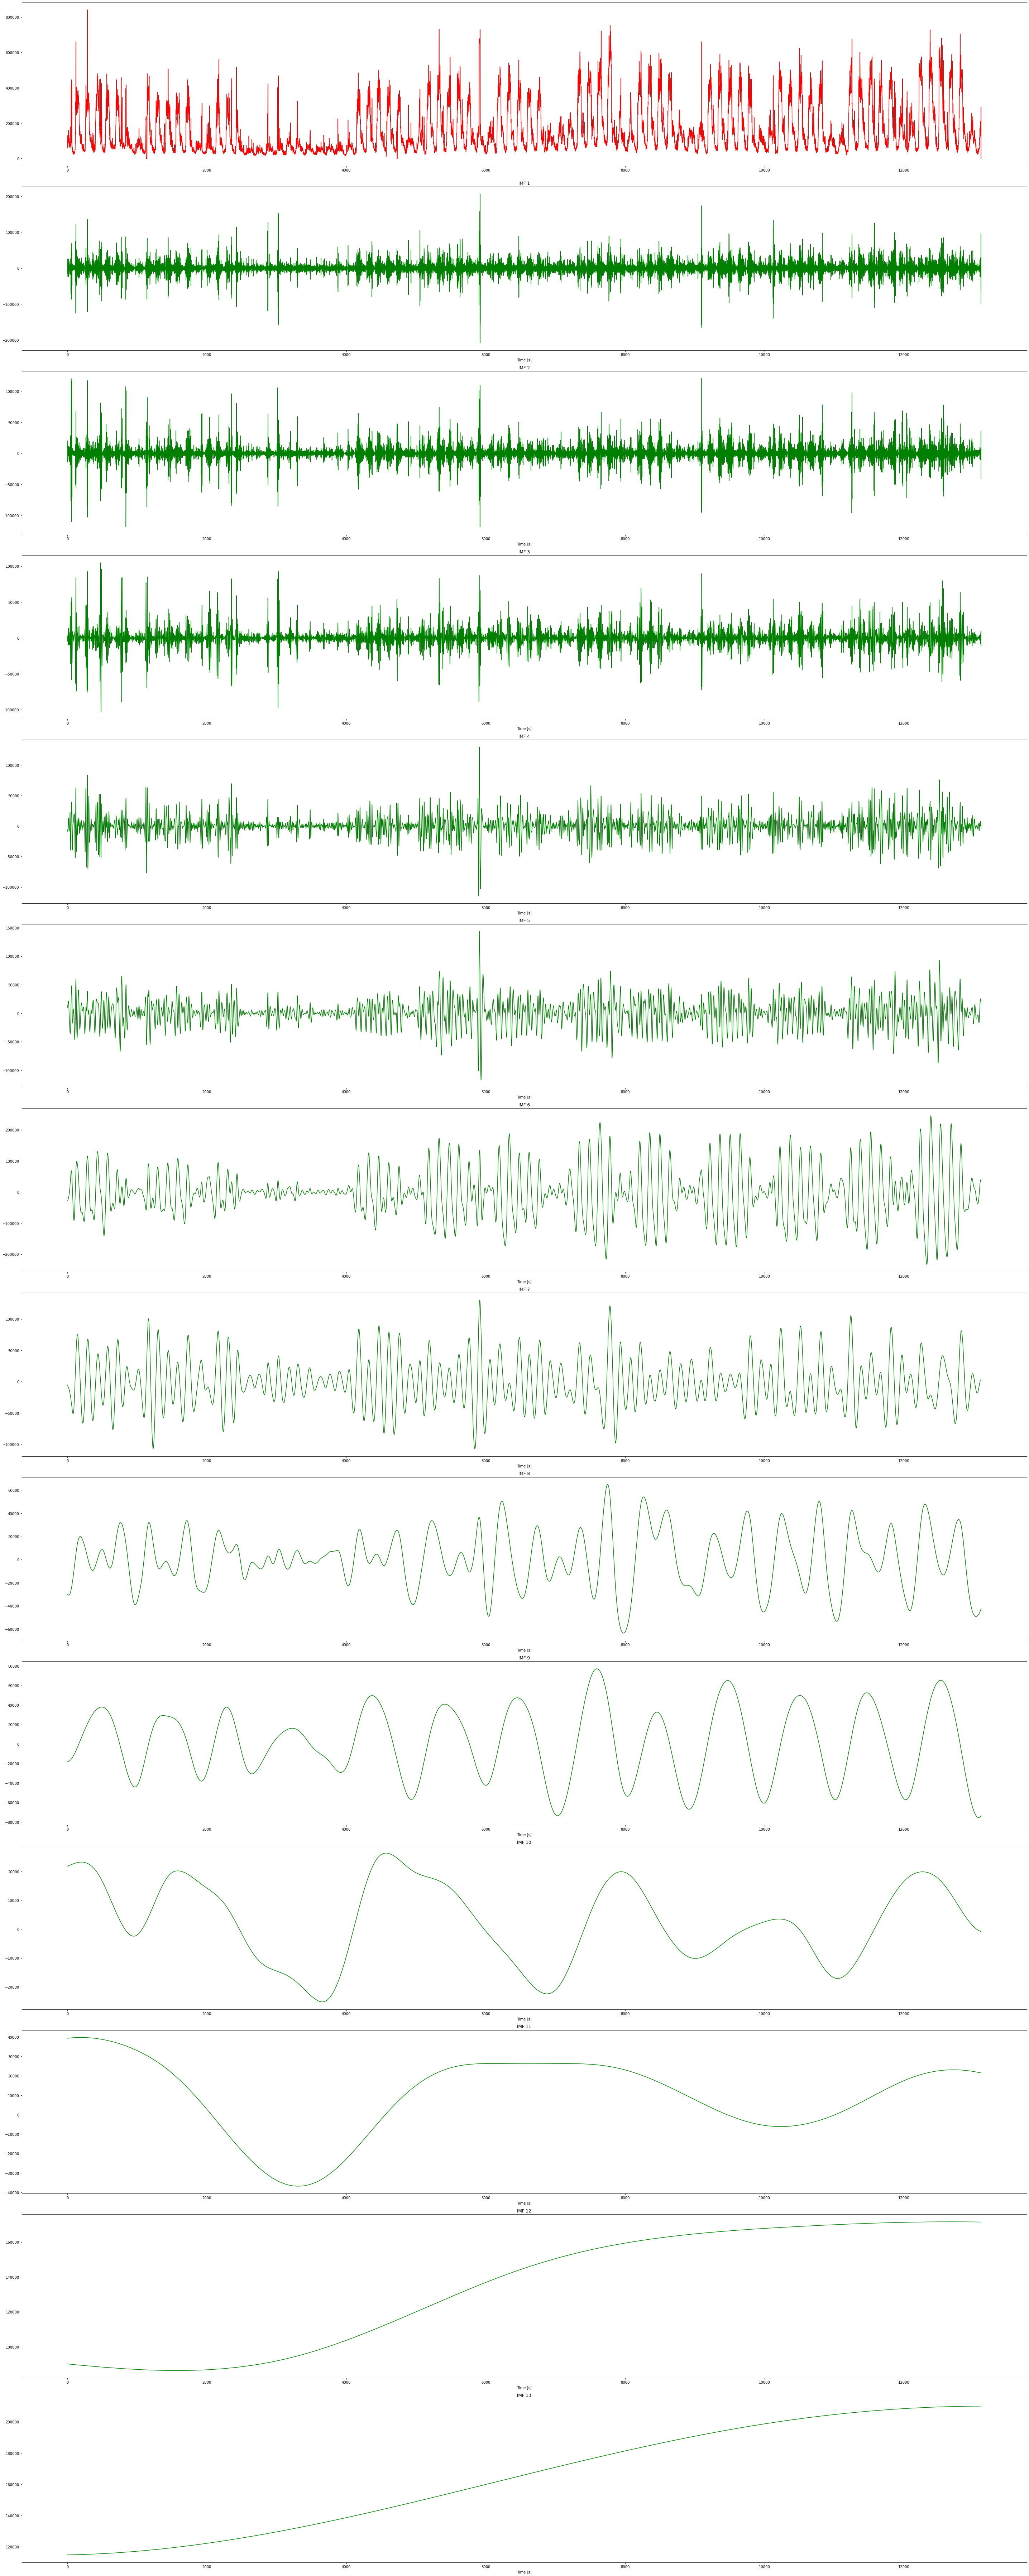

In [5]:
from matplotlib import pyplot as plt
N = IMF.shape[0]+1
plt.figure(figsize=(40,100))
plt.subplot(N,1,1)
plt.plot(data, 'r')
#plt.title("Input signal: $S(t)=cos(22\pi t^2) + 6t^2$")
#plt.xlabel("Time [s]")
for n, imf in enumerate(IMF):
    plt.subplot(N,1,n+2)
    plt.plot(imf, 'g')
    plt.title("IMF "+str(n+1))
    plt.xlabel("Time [s]")
plt.tight_layout()
plt.show()

In [6]:
def create_dataset(dataset, time_step):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step):
        a = dataset[i:(i+time_step)]
        dataX.append(a)
        dataY.append(dataset[i + time_step])
    return np.array(dataX), np.array(dataY)  

In [7]:
a = int(len(IMF[0])*0.8)
print(a)
train_data_0, test_data_0 = IMF[0][0:a+1], IMF[0][a:]
print(len(train_data_0),len(test_data_0))
time_step=1
X_train_0, y_train_0 = create_dataset(train_data_0, time_step)
X_test_0, y_test_0 = create_dataset(test_data_0, time_step)

10484
10485 2621


In [8]:
b = int(len(IMF[1])*0.8)
print(b)
train_data_1, test_data_1 = IMF[1][0:a+1], IMF[1][a:]
print(len(train_data_1),len(test_data_1))
X_train_1, y_train_1 = create_dataset(train_data_1, time_step)
X_test_1, y_test_1 = create_dataset(test_data_1, time_step)

10484
10485 2621


In [9]:
c = int(len(IMF[2])*0.8)
print(c)
train_data_2, test_data_2 = IMF[2][0:a+1], IMF[2][a:]
print(len(train_data_2),len(test_data_2))
X_train_2, y_train_2 = create_dataset(train_data_2, time_step)
X_test_2, y_test_2 = create_dataset(test_data_2, time_step)

10484
10485 2621


In [10]:
d = int(len(IMF[3])*0.8)
print(d)
train_data_3, test_data_3 = IMF[3][0:a+1], IMF[3][a:]
print(len(train_data_1),len(test_data_1))
X_train_3, y_train_3 = create_dataset(train_data_3, time_step)
X_test_3, y_test_3 = create_dataset(test_data_3, time_step)

10484
10485 2621


In [11]:
e = int(len(IMF[4])*0.8)
print(e)
train_data_4, test_data_4 = IMF[4][0:a+1], IMF[4][a:]
print(len(train_data_4),len(test_data_4))
X_train_4, y_train_4 = create_dataset(train_data_4, time_step)
X_test_4, y_test_4 = create_dataset(test_data_4, time_step)

10484
10485 2621


In [12]:
f = int(len(IMF[5])*0.8)
print(f)
train_data_5, test_data_5 = IMF[5][0:a+1], IMF[5][a:]
print(len(train_data_5),len(test_data_5))
X_train_5, y_train_5 = create_dataset(train_data_5, time_step)
X_test_5, y_test_5 = create_dataset(test_data_5, time_step)

10484
10485 2621


In [13]:
g = int(len(IMF[6])*0.8)
print(g)
train_data_6, test_data_6 = IMF[6][0:a+1], IMF[6][a:]
print(len(train_data_6),len(test_data_6))
X_train_6, y_train_6 = create_dataset(train_data_6, time_step)
X_test_6, y_test_6 = create_dataset(test_data_6, time_step)

10484
10485 2621


In [14]:
h = int(len(IMF[7])*0.8)
print(h)
train_data_7, test_data_7 = IMF[7][0:a+1], IMF[7][a:]
print(len(train_data_7),len(test_data_7))
X_train_7, y_train_7 = create_dataset(train_data_7, time_step)
X_test_7, y_test_7 = create_dataset(test_data_7, time_step)

10484
10485 2621


In [15]:
i = int(len(IMF[8])*0.8)
print(i)
train_data_8, test_data_8 = IMF[8][0:a+1], IMF[8][a:]
print(len(train_data_8),len(test_data_8))
X_train_8, y_train_8 = create_dataset(train_data_8, time_step)
X_test_8, y_test_8 = create_dataset(test_data_8, time_step)

10484
10485 2621


In [16]:
i = int(len(IMF[9])*0.8)
print(i)
train_data_9, test_data_9 = IMF[9][0:a+1], IMF[9][a:]
print(len(train_data_9),len(test_data_9))
X_train_9, y_train_9 = create_dataset(train_data_9, time_step)
X_test_9, y_test_9 = create_dataset(test_data_9, time_step)

10484
10485 2621


In [17]:
i = int(len(IMF[10])*0.8)
print(i)
train_data_10, test_data_10 = IMF[10][0:a+1], IMF[10][a:]
print(len(train_data_10),len(test_data_10))
X_train_10, y_train_10 = create_dataset(train_data_10, time_step)
X_test_10, y_test_10 = create_dataset(test_data_10, time_step)

10484
10485 2621


In [18]:
i = int(len(IMF[11])*0.8)
print(i)
train_data_11, test_data_11 = IMF[11][0:a+1], IMF[11][a:]
print(len(train_data_11),len(test_data_11))
X_train_11, y_train_11 = create_dataset(train_data_11, time_step)
X_test_11, y_test_11 = create_dataset(test_data_11, time_step)

10484
10485 2621


In [19]:
i = int(len(IMF[12])*0.8)
print(i)
train_data_12, test_data_12 = IMF[12][0:a+1], IMF[12][a:]
print(len(train_data_12),len(test_data_12))
X_train_12, y_train_12 = create_dataset(train_data_12, time_step)
X_test_12, y_test_12 = create_dataset(test_data_12, time_step)

10484
10485 2621


In [20]:
train_data_1

array([ -1563.23756471, -14066.26660958, -11161.67817256, ...,
        -7209.41787716,   -634.29991831,  12848.08666618])

In [21]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [22]:
def statistics(y_true, y_pred):
    MAE = metrics.mean_absolute_error(y_true, y_pred)
    print('Mean Absolute Error : %.3f' % MAE )
    RMSE = np.sqrt(metrics.mean_squared_error(y_true, y_pred))
    print('Root Mean Squared Error : %.3f' % RMSE )
    MSE = metrics.mean_squared_error(y_true, y_pred)
    print('Mean Squared Error : %.3f' % MSE, )
    MAPE = mean_absolute_percentage_error(y_true, y_pred)
    print('MAPE  :%.3f' % MAPE)
    NRMSE = RMSE/(np.max(y_true)- np.min(y_true))
    print('Normalized Root Mean Squared Error : %.3f' % NRMSE )
    d=[]
    d.append(MAE)
    d.append(RMSE)
    d.append(MSE)
    d.append(MAPE)
    d.append(NRMSE)
    return d

# High Frequency (IMF[0], IMF[1], IMF[2], IMF[3])

# Echo State Network

In [23]:
esn = ESN.ESN(n_inputs = 1,n_outputs = 1,)

esn.fit(X_train_0,y_train_0)
esn_pred_0 = esn.predict(X_test_0)

esn.fit(X_train_1,y_train_1)
esn_pred_1 = esn.predict(X_test_1)


esn.fit(X_train_2,y_train_2)
esn_pred_2 = esn.predict(X_test_2)

esn.fit(X_train_3,y_train_3)
esn_pred_3 = esn.predict(X_test_3)

final_esn_pred = esn_pred_0+esn_pred_1+esn_pred_2+esn_pred_3
actual_y_test_esn = y_test_0+y_test_1+y_test_2+y_test_3

esnf=[]
esnf.append("EchoStateNetwork")
esnf.append("HighFrequency")
esnf.extend(statistics(actual_y_test_esn,final_esn_pred))

Mean Absolute Error : 9331166.638
Root Mean Squared Error : 9392405.146
Mean Squared Error : 88217274427077.844
MAPE  :283097.724
Normalized Root Mean Squared Error : 21.986


# Medium Frequency (IMF[4], IMF[5], IMF[6], IMF[7], IMF[8])

# SVM

In [24]:
svr = SVR()

svr.fit(X_train_4,y_train_4)
svr_pred_4 = svr.predict(X_test_4)

svr.fit(X_train_5,y_train_5)
svr_pred_5 = svr.predict(X_test_5)

svr.fit(X_train_6,y_train_6)
svr_pred_6 = svr.predict(X_test_6)

svr.fit(X_train_7,y_train_7)
svr_pred_7 = svr.predict(X_test_7)

svr.fit(X_train_8,y_train_8)
svr_pred_8 = svr.predict(X_test_8)


final_svr_pred = svr_pred_4+svr_pred_5+svr_pred_6+svr_pred_7+svr_pred_8

actual_y_test_svr =y_test_4+y_test_5+y_test_6+y_test_7+y_test_8

svrf=[]
svrf.append("SupportVectorMachine")
svrf.append("MediumFrequency")
svrf.extend(statistics(actual_y_test_svr,final_svr_pred))

Mean Absolute Error : 118343.289
Root Mean Squared Error : 140157.538
Mean Squared Error : 19644135360.820
MAPE  :102.734
Normalized Root Mean Squared Error : 0.259


# Low Frequency (IMF[9], IMF[10], IMF[11], IMF[12])

# ARIMA

In [25]:
start=a+2
end=len(IMF[0])

mod = ARIMA(train_data_9)
fit = mod.fit()
arima_pred_9=fit.predict(start=start,end=end)

mod = ARIMA(train_data_10)
fit = mod.fit()
arima_pred_10=fit.predict(start=start,end=end)

mod = ARIMA(train_data_11)
fit = mod.fit()
arima_pred_11=fit.predict(start=start,end=end)

mod = ARIMA(train_data_12)
fit = mod.fit()
arima_pred_12=fit.predict(start=start,end=end)


    
final_arima_pred =arima_pred_9+arima_pred_10+arima_pred_11+arima_pred_12

actual_y_test_arima =y_test_9+y_test_10+y_test_11+y_test_12

arimaf=[]
arimaf.append("ARIMA")
arimaf.append("LowFrequency")
arimaf.extend(statistics(actual_y_test_arima,final_arima_pred))

Mean Absolute Error : 102310.869
Root Mean Squared Error : 105175.130
Mean Squared Error : 11061808058.309
MAPE  :25.775
Normalized Root Mean Squared Error : 1.622


In [27]:
actual_test = y_test_1+y_test_2+y_test_3+y_test_4+y_test_5+y_test_6+y_test_7+y_test_8+y_test_9+y_test_10+y_test_11+y_test_12

In [28]:
final_pred= final_esn_pred + final_svr_pred + final_arima_pred

In [36]:
ensemblef=[]
ensemblef.append("Final")
ensemblef.append("All")
ensemblef.extend(statistics(actual_test,final_pred[0]))

Mean Absolute Error : 121195.455
Root Mean Squared Error : 175802.430
Mean Squared Error : 30906494240.337
MAPE  :25.354
Normalized Root Mean Squared Error : 0.261


In [37]:
final=[]
final.append(esnf)
final.append(svrf)
final.append(arimaf)
final.append(ensemblef)
data=pd.DataFrame(final,columns=['Algorithm','Frequency','MAE','RMSE','MSE','MAPE','NRMSE'])
data

,Algorithm,Frequency,MAE,RMSE,MSE,MAPE,NRMSE
0,EchoStateNetwork,HighFrequency,9.331167e+06,9.392405e+06,8.821727e+13,283097.724365,21.985605
1,SupportVectorMachine,MediumFrequency,1.183433e+05,1.401575e+05,1.964414e+10,102.733855,0.259500
2,ARIMA,LowFrequency,1.023109e+05,1.051751e+05,1.106181e+10,25.774592,1.621714
3,Final,All,1.211955e+05,1.758024e+05,3.090649e+10,25.353542,0.261239
